In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

In [101]:
# load data
df = pd.read_csv('/Users/homefolder/Downloads/nhis_00008.csv')

In [102]:
((df['HIMCAREE'] > 0) & (df['HIPRIVATEE'] > 0)).sum()

np.int64(27651)

In [ ]:
df = df[(df['HIPRIVATEE']==1) & (df['ASTATFLG']==1)].copy()

((df['HIPRIVATEE']==1) & (df['HINOTYR']==1)).sum()

In [112]:
df.head()

,YEAR,SERIAL,STRATA,PSU,NHISHID,REGION,PERNUM,NHISPID,HHX,SAMPWEIGHT,ASTATFLG,CSTATFLG,AGE,SEX,MARSTCUR,FAMKIDNO,RACENEW,CITIZEN,ARMFEV,EDUC,EMPSTAT,HOURSWRK,EMPHI,GOTWELF,GOTRET,WCHSSISSDI,HEALTH,BMICALC,DVINT,URGCAREYRNO,HOSPNGHT,ERYRNO,THERAPYR,SAWMENT,DVINTWELL,DELAYCOST,YDELAYMENTAL,DELAYINS,WORMEDBILL,YDELAYMEDYR,YSKIMPMEDYR,YSKIPMEDYR,HIPROBPAYR,HEALTHPROV,HINOTCOVE,HIPRIVATEE,HICHIPE,HIMILITE,HIOTHGOVE,HISTATEE,HIMCAIDE,HIMCAREE,HINOTYR,HIP1WHO,HIP1CVROTR,HIP1COST,HIP1CAID,HIP1CARE,HIP1RELPOLICY,HIP2COST,HIP2CAID,HIP2CARE,HIP2OGOV,MDEXUPADV,ARTHGLUPEV,ASTHMAEV,CANCEREV,CHEARTDIEV,CHRFATIGEV,CHOLHIGHEV,DEMENTIAEV,DEPRESSEV,DIABETICEV,HEARTATTEV,HYPERTENEV,STROKEV,COPDEV,IMSPCHC,ALCANYTP,SMOKFREQNOW,LAMTWRK,HRAUSES,GLASSLENS
3,2022,3,134,13,0002022H000006,2,1,0002022H00000610,H000006,2681.0,1,0,68,1,5,0,100,2,11,505,200,0,1,10,2,0,4,25.0,200,0,2,20,2,1,1,1,1,1,2,1,1,1,2,0,1,1,10,10,10,10,1,2,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,2,3,1,1,2
4,2022,4,106,53,0002022H000007,3,1,0002022H00000710,H000007,10233.0,1,0,73,1,1,1,100,2,20,201,200,0,0,10,1,0,3,24.0,200,0,1,10,1,1,96,1,1,1,3,1,1,1,1,0,1,1,10,10,10,10,1,2,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,5,3,1,1,2
8,2022,7,143,14,0002022H000013,4,1,0002022H00001310,H000013,12814.0,1,0,59,1,7,0,100,2,11,201,200,0,0,10,1,2,5,26.6,200,0,1,20,2,2,1,2,1,1,1,1,2,2,2,0,2,1,10,10,10,10,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,1,1,2,2,2,1,1,2,1,1,2,4,1,2,2,2
9,2022,8,105,61,0002022H000014,1,1,0002022H00001410,H000014,6586.0,1,0,67,2,7,0,100,2,11,400,100,6,1,10,1,0,3,29.9,200,0,1,10,1,1,96,1,1,1,3,1,1,1,1,0,1,1,10,10,10,10,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,1,2,1,2,1,2,2,1,1,1,7,2,1,1,2
11,2022,10,113,17,0002022H000018,4,1,0002022H00001810,H000018,3286.0,1,0,82,2,6,0,100,2,11,201,200,0,0,10,2,0,4,25.7,200,0,2,10,2,1,96,1,1,1,3,1,1,1,1,0,1,1,10,25,10,10,1,2,1,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,2,1,1,1,1,2,1,2,2,5,1,2,1,2


In [114]:
df[df['HEALTHPROV']==1]

,YEAR,SERIAL,STRATA,PSU,NHISHID,REGION,PERNUM,NHISPID,HHX,SAMPWEIGHT,ASTATFLG,CSTATFLG,AGE,SEX,MARSTCUR,FAMKIDNO,RACENEW,CITIZEN,ARMFEV,EDUC,EMPSTAT,HOURSWRK,EMPHI,GOTWELF,GOTRET,WCHSSISSDI,HEALTH,BMICALC,DVINT,URGCAREYRNO,HOSPNGHT,ERYRNO,THERAPYR,SAWMENT,DVINTWELL,DELAYCOST,YDELAYMENTAL,DELAYINS,WORMEDBILL,YDELAYMEDYR,YSKIMPMEDYR,YSKIPMEDYR,HIPROBPAYR,HEALTHPROV,HINOTCOVE,HIPRIVATEE,HICHIPE,HIMILITE,HIOTHGOVE,HISTATEE,HIMCAIDE,HIMCAREE,HINOTYR,HIP1WHO,HIP1CVROTR,HIP1COST,HIP1CAID,HIP1CARE,HIP1RELPOLICY,HIP2COST,HIP2CAID,HIP2CARE,HIP2OGOV,MDEXUPADV,ARTHGLUPEV,ASTHMAEV,CANCEREV,CHEARTDIEV,CHRFATIGEV,CHOLHIGHEV,DEMENTIAEV,DEPRESSEV,DIABETICEV,HEARTATTEV,HYPERTENEV,STROKEV,COPDEV,IMSPCHC,ALCANYTP,SMOKFREQNOW,LAMTWRK,HRAUSES,GLASSLENS


In [88]:
# recode HIMCAIDE
df['HIMCAIDE'] = df['HIMCAIDE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAIDE'].isin([1, 2, 3]), np.nan).astype('Int64')

# recode HIMCAIRE
df['HIMCAREE'] = df['HIMCAREE'].replace({
    1: 0,
    2: 1,
    3: 1
}).where(df['HIMCAREE'].isin([1, 2, 3]), np.nan).astype('Int64')

# recode 
df['HIP1RELPOLICY'] = df['HIP1RELPOLICY'].replace({
    1: 'Child',
    2: 'Spouse',
    3: 'Other',
    4: 'Other'
}).where(df['HIP1RELPOLICY'].isin([1, 2, 3]), np.nan)

In [89]:
# recode REGION
df['REGION'] = df['REGION'].replace({1: 'Northeast', 2: 'North Central/Midwest', 3: 'South', 4: 'West'})

# recode SEX
df['SEX'] = df['SEX'].astype(object)
df.loc[df['SEX'].isin([7, 8, 9]), 'SEX'] = np.nan
df.loc[df['SEX'] == 1, 'SEX'] = 'Male'
df.loc[df['SEX'] == 2, 'SEX'] = 'Female'

# recode AGE
df.loc[df['AGE'].isin([997,998,999]), 'AGE'] = np.nan

# recode MARSTCUR
df['MARSTCUR'] = df['MARSTCUR'].astype(object)
df.loc[df['MARSTCUR'].isin([0, 9]), 'MARSTCUR'] = np.nan
df.loc[df['MARSTCUR'] == 1, 'MARSTCUR'] = 'Married, spouse present'
df.loc[df['MARSTCUR'] == 2, 'MARSTCUR'] = 'Married, spouse absent'
df.loc[df['MARSTCUR'] == 3, 'MARSTCUR'] = 'Married, spouse in household unknown'
df.loc[df['MARSTCUR'] == 4, 'MARSTCUR'] = 'Separated'
df.loc[df['MARSTCUR'] == 5, 'MARSTCUR'] = 'Divorced'
df.loc[df['MARSTCUR'] == 6, 'MARSTCUR'] = 'Widowed'
df.loc[df['MARSTCUR'] == 7, 'MARSTCUR'] = 'Living with partner'
df.loc[df['MARSTCUR'] == 8, 'MARSTCUR'] = 'Never Married'

# recode RACENEW
df['RACENEW'] = df['RACENEW'].astype(object)
df.loc[df['RACENEW'] == 100, 'RACENEW'] = 'White'
df.loc[df['RACENEW'] == 510, 'RACENEW'] = 'Other Race and Multiple Race'
df.loc[df['RACENEW'] == 200, 'RACENEW'] = 'Black/African American'
df.loc[df['RACENEW'] == 542, 'RACENEW'] = 'American Indian/Alaska Native and Any Other Race'
df.loc[df['RACENEW'] == 400, 'RACENEW'] = 'Asian only'
df.loc[df['RACENEW'] == 300, 'RACENEW'] = 'American Indian/Alaska Native only'
df.loc[df['RACENEW'].isin([997, 998, 999]), 'RACENEW'] = np.nan

# recode CITIZEN
df['CITIZEN'] = df['CITIZEN'].astype(object)
df.loc[df['CITIZEN'] == 1, 'CITIZEN'] = 0
df.loc[df['CITIZEN'] == 2, 'CITIZEN'] = 1
df.loc[df['CITIZEN'].isin([7, 8, 9]), 'CITIZEN'] = np.nan

# recode ARMFEV
df['ARMFEV'] = df['ARMFEV'].astype(object)
df.loc[df['ARMFEV'] == 0, 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 11, 'ARMFEV'] = 0
df.loc[df['ARMFEV'] == 20, 'ARMFEV'] = 1
df.loc[df['ARMFEV'].isin([98, 99, 97]), 'ARMFEV'] = np.nan
df.loc[df['ARMFEV'] == 12, 'ARMFEV'] = 0

In [90]:
# recode EDUC
df['EDUC'] = df['EDUC'].astype(object)
df.loc[df['EDUC'] == 201, 'EDUC'] = 'High School Graduate'
df.loc[df['EDUC'] == 301, 'EDUC'] = 'Some college, no degree'
df.loc[df['EDUC'] == 0, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 505, 'EDUC'] = 'Professional School or Doctoral degree, topcoded (MD, DDS, DVM, JD, PhD, EdD)'
df.loc[df['EDUC'] == 303, 'EDUC'] = 'AA degree: academic program'
df.loc[df['EDUC'] == 400, 'EDUC'] = "Bachelor's degree (BA,AB,BS,BBA)"
df.loc[df['EDUC'] == 202, 'EDUC'] = 'GED or equivalent'
df.loc[df['EDUC'] == 103, 'EDUC'] = 'Grades 1-11 (no further detail)'
df.loc[df['EDUC'] == 501, 'EDUC'] = "Master's degree (MA,MS,Med,MBA)"
df.loc[df['EDUC'] == 302, 'EDUC'] = 'AA degree: technical/vocational/occupational'
df.loc[df['EDUC'] == 116, 'EDUC'] = '12th grade, no diploma'
df.loc[df['EDUC'] == 999, 'EDUC'] = np.nan
df.loc[df['EDUC'] == 997, 'EDUC'] = np.nan

In [91]:
# recode EMPSTAT
df['EMPSTAT'] = df['EMPSTAT'].astype(object)
df.loc[df['EMPSTAT'] == 100, 'EMPSTAT'] = 'Employed'
df.loc[df['EMPSTAT'] == 0, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 200, 'EMPSTAT'] = 'Not Employed'
df.loc[df['EMPSTAT'] == 999, 'EMPSTAT'] = np.nan
df.loc[df['EMPSTAT'] == 'Not Employed', 'EMPSTAT'] = 0
df.loc[df['EMPSTAT'] == 'Employed', 'EMPSTAT'] = 1

In [92]:
df.loc[df['HOURSWRK'].isin([97, 98, 99]), 'HOURSWRK'] = np.nan

In [93]:
# recode GOTRET
df['GOTRET'] = df['GOTRET'].astype(object)
df.loc[df['GOTRET'] == 2, 'GOTRET'] = 'SSDI'
df.loc[df['GOTRET'] == 1, 'GOTRET'] = 'SSI'
df.loc[df['GOTRET'].isin([9, 0, 7, 8]), 'GOTRET'] = np.nan

In [94]:
# recode WCHSSISSDI
df['WCHSSISSDI'] = df['WCHSSISSDI'].astype(object)
df.loc[df['WCHSSISSDI'] == 0, 'WCHSSISSDI'] = np.nan
df.loc[df['WCHSSISSDI'] == 1, 'WCHSSISSDI'] = 'SSI'
df.loc[df['WCHSSISSDI'] == 2, 'WCHSSISSDI'] = 'SSDI'
df.loc[df['WCHSSISSDI'] == 9, 'WCHSSISSDI'] = np.nan
df.loc[df['WCHSSISSDI'] == 3, 'WCHSSISSDI'] = 'Both SSI and SSDI'

In [95]:
# recode HEALTH
df['HEALTH'] = df['HEALTH'].astype(object)
df.loc[df['HEALTH'] == 3, 'HEALTH'] = 'Good'
df.loc[df['HEALTH'] == 2, 'HEALTH'] = 'Very Good'
df.loc[df['HEALTH'] == 1, 'HEALTH'] = 'Excellent'
df.loc[df['HEALTH'] == 4, 'HEALTH'] = 'Fair'
df.loc[df['HEALTH'] == 5, 'HEALTH'] = 'Poor'
df.loc[df['HEALTH'].isin([7, 9]), 'HEALTH'] = np.nan

In [96]:
df['HEALTHPROV']

3        0
4        0
8        0
9        0
11       0
        ..
35098    0
35099    0
35102    0
35107    0
35113    0
Name: HEALTHPROV, Length: 10544, dtype: int64

In [97]:
df['DVINT'] = df['DVINT'].replace({
    100: 'Never',
    200: 'Less than 1 year',
    201: 'Visits in the past 2 weeks',
    202: '2 weeks to less than 6 months',
    203: 'Under 6 months',
    204: '6 months to less than 12 months',
    300: '1 year or more',
    301: '1 year',
    302: '1 year to less than 2 years',
    303: '1 year to less than 3 years',
    304: '2 years to less than 3 years',
    305: '2 years to less than 5 years',
    306: '2 years',
    307: '2 to 4 years',
    308: '3 to 4 years',
    309: '3 years to less than 5 years',
    310: 'More than 3 years',
    400: '5 years or more',
    401: '5 to 9 years',
    402: 'More than 10 years'
}).where(df['DVINT'].isin(range(100,403)), np.nan)

df['URGCAREYRNO'] = df['URGCAREYRNO'].replace({
    0: '0 times',
    1: '1 time',
    2: '2 times',
    3: '3 times',
    4: '4 times',
    5: '5+ times',
}).where(df['URGCAREYRNO'].isin(range(0,6)), np.nan)

df['ERYRNO'] = df['ERYRNO'].replace({
    10: 'No visits',
    20: '1 visit',
    30: '2 to 3 visits',
    31: '2 visits',
    32: '3 visits',
    40: '4 or more visits',
    41: '4 to 9 visits',
    42: '4 to 5 visits',
    43: '6 to 7 visits',
    44: '8 to 9 visits',
    45: '10 to 12 visits',
    46: '13 or more visits',
    47: '13 to 15 visits',
    48: '16 or more visits'
}).where(df['ERYRNO'].isin(range(10,49)), np.nan)

df['DVINTWELL'] = df['DVINTWELL'].replace({
    0: 'Never',
    1: 'Within the past year',
    2: 'More than 1 year ago but less than 2 years ago',
    3: 'More than 2 years ago but less than 3 years ago',
    4: 'More than 3 years ago but less than 5 years ago',
    5: 'More than 5 years ago but less than 10 years ago',
    6: '10+ years ago'
}).where(df['DVINTWELL'].isin(range(0,7)), np.nan)

df['WORMEDBILL'] = df['WORMEDBILL'].replace({
    1: 'Very worried',
    2: 'Somewhat worried',
    3: 'Not at all worried'
}).where(df['WORMEDBILL'].isin(range(1,4)), np.nan)

df['HICHIPE'] = np.select(
    [df['HICHIPE'] == 10, df['HICHIPE'].isin(range(20, 23))],
    [0, 1],
    default=np.nan
)

df['HIMILITE'] = np.select(
    [df['HIMILITE'] == 10, df['HIMILITE'].isin(range(20, 26))],
    [0, 1],
    default=np.nan
)

df['HIOTHGOVE'] = np.select(
    [df['HIOTHGOVE'] == 10, df['HIOTHGOVE'].isin(range(20, 23))],
    [0, 1],
    default=np.nan
)

df['HIPRIVATEE'] = np.select(
    [df['HIPRIVATEE'] == 1, df['HIPRIVATEE'].isin(range(2,4))],
    [0, 1],
    default=np.nan
)

df['HISTATEE'] = np.select(
    [df['HIOTHGOVE'] == 10, df['HIOTHGOVE'].isin(range(20, 23))],
    [0, 1],
    default=np.nan
)

In [98]:
# change vars values from 1,2 to 0,1
def replace_yes_no(column):
    return column.replace({1: 0, 2: 1}).where(column.isin([1, 2]), np.nan).astype('int64')

cols_to_replace = ['HINOTYR', 'HIP1CVROTR',
                   'HIP1CAID', 'HIP1CARE', 'HIP2CAID', 'HIP2CARE', 'HIP2OGOV',
                   'MDEXUPADV', 'ARTHGLUPEV', 'ASTHMAEV', 'HOSPNGHT','THERAPYR','SAWMENT',
                   'DELAYCOST', 'DELAYINS','YDELAYMEDYR','YSKIMPMEDYR',
                   'YSKIPMEDYR', 'HIPROBPAYR', 'HEALTHPROV', 'HINOTCOVE', 'EMPHI', 'GOTWELF',
                   'CHEARTDIEV', 'CHRFATIGEV', 'CHOLHIGHEV', 'DEMENTIAEV', 'DEPRESSEV', 'DIABETICEV',
                   'HEARTATTEV', 'HYPERTENEV','STROKEV', 'COPDEV',
                   'IMSPCHC', 'HRAUSES', 'GLASSLENS']
df[cols_to_replace] = df[cols_to_replace].apply(replace_yes_no)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# recode ALCANYTP
df['ALCANYTP'] = df['ALCANYTP'].replace({
    1: 'Every day',
    2: 'Week',
    3: 'Month',
    4: 'Year',
    5: 'Never/None'
}).where(df['ALCANYTP'].isin(range(1,6)), np.nan)

# recode SMOKFREQNOW
df['SMOKFREQNOW'] = df['SMOKFREQNOW'].replace({
    1: 'Not at all',
    2: 'Some days',
    3: 'Every day',
}).where(df['SMOKFREQNOW'].isin(range(1,4)), np.nan)

# recode LAMTWRK
df['LAMTWRK'] = df['LAMTWRK'].replace({
    1: 'Not limited in work',
    2: 'Limited in kind/amt of work',
    3: 'Unable to work',
}).where(df['LAMTWRK'].isin(range(1,4)), np.nan)


In [ ]:
df.isna().sum()

YEAR                 0
SERIAL               0
STRATA               0
PSU                  0
NHISHID              0
REGION               0
PERNUM               0
NHISPID              0
HHX                  0
SAMPWEIGHT           0
ASTATFLG             0
CSTATFLG             0
AGE                 18
SEX                  0
MARSTCUR           522
FAMKIDNO             0
RACENEW            799
CITIZEN            548
ARMFEV             510
EDUC                83
EMPSTAT            519
HOURSWRK            38
EMPHI             6142
GOTWELF          10544
GOTRET             662
WCHSSISSDI        8997
HEALTH               3
BMICALC              0
DVINT               90
URGCAREYRNO        104
HOSPNGHT            84
ERYRNO              92
THERAPYR           164
SAWMENT            201
DVINTWELL         8647
DELAYCOST           84
YDELAYMENTAL         0
DELAYINS            95
WORMEDBILL          64
YDELAYMEDYR       3030
YSKIMPMEDYR       3030
YSKIPMEDYR        3029
HIPROBPAYR          45
HEALTHPROV 

In [ ]:
df['HIP2CARE']

3        <NA>
4        <NA>
8        <NA>
9        <NA>
11       <NA>
         ... 
35098    <NA>
35099    <NA>
35102    <NA>
35107    <NA>
35113    <NA>
Name: HIP2CARE, Length: 10544, dtype: Int64

In [ ]:
df.shape
num_samples = df.shape[0]

In [ ]:
df.isna().sum().tail()

ALCANYTP       2036
SMOKFREQNOW    6081
LAMTWRK          22
HRAUSES           2
GLASSLENS         2
dtype: int64

In [ ]:
df.describe()

,YEAR,SERIAL,STRATA,PSU,PERNUM,SAMPWEIGHT,ASTATFLG,CSTATFLG,AGE,FAMKIDNO,HOURSWRK,EMPHI,GOTWELF,BMICALC,HOSPNGHT,THERAPYR,SAWMENT,DELAYCOST,YDELAYMENTAL,DELAYINS,YDELAYMEDYR,YSKIMPMEDYR,YSKIPMEDYR,HIPROBPAYR,HEALTHPROV,HINOTCOVE,HIPRIVATEE,HICHIPE,HIMILITE,HIOTHGOVE,HISTATEE,HIMCAIDE,HIMCAREE,HINOTYR,HIP1WHO,HIP1CVROTR,HIP1COST,HIP1CAID,HIP1CARE,HIP1RELPOLICY,HIP2COST,HIP2CAID,HIP2CARE,HIP2OGOV,MDEXUPADV,ARTHGLUPEV,ASTHMAEV,CANCEREV,CHEARTDIEV,CHRFATIGEV,CHOLHIGHEV,DEMENTIAEV,DEPRESSEV,DIABETICEV,HEARTATTEV,HYPERTENEV,STROKEV,COPDEV,IMSPCHC,HRAUSES,GLASSLENS
count,10544.0,10544.000000,10544.000000,10544.000000,10544.0,10544.000000,10544.0,10544.0,10526.000000,10544.000000,10506.00000,4402.0,0.0,10544.000000,10460.0,10380.0,10343.0,10460.0,10544.000000,10449.0,7514.0,7514.0,7515.0,10499.0,0.0,10544.0,10544.0,10544.000000,10544.000000,10544.000000,0.0,10544.0,10544.0,8585.0,10544.0,0.0,10544.0,0.0,0.0,0.0,10544.0,0.0,0.0,0.0,10156.0,10523.0,10536.0,10544.000000,10518.0,10522.0,10509.0,10532.0,10529.0,10534.0,10529.0,10529.0,10530.0,10529.0,10495.0,10542.0,10542.0
mean,2022.0,14415.615326,125.807568,29.737766,1.0,9007.266787,1.0,0.0,56.339350,0.448407,12.54150,0.406406,<NA>,125.028860,0.120172,0.14027,0.124722,0.091396,1.176878,0.056848,0.061352,0.050838,0.045642,0.122964,<NA>,0.197553,0.0,0.000948,0.124052,0.005121,NaN,0.307379,0.503035,0.026441,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.206577,0.334125,0.146545,1.147382,0.086708,0.031553,0.357693,0.0188,0.227942,0.140782,0.052237,0.438218,0.058784,0.085098,0.062315,0.069816,0.660785
std,0.0,8370.880624,15.588523,27.783061,0.0,6079.694691,0.0,0.0,19.391875,0.893872,19.15604,0.491218,<NA>,290.478648,0.325178,0.347283,0.330419,0.288185,0.970548,0.231562,0.239991,0.219682,0.208721,0.328412,<NA>,0.398172,0.0,0.030783,0.329656,0.071384,NaN,0.46143,0.500015,0.160453,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.40487,0.471706,0.353669,0.424178,0.281421,0.174815,0.479344,0.135824,0.419525,0.347813,0.222515,0.496192,0.235232,0.279041,0.241739,0.254849,0.473465
min,2022.0,3.000000,100.000000,1.000000,1.0,998.000000,1.0,0.0,18.000000,0.000000,0.00000,0.0,<NA>,15.200000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,<NA>,0.0,0.0,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2022.0,7156.250000,113.000000,8.000000,1.0,4677.000000,1.0,0.0,39.000000,0.000000,0.00000,0.0,<NA>,24.400000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,<NA>,0.0,0.0,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2022.0,14485.500000,126.000000,22.000000,1.0,7230.000000,1.0,0.0,61.000000,0.000000,0.00000,0.0,<NA>,28.200000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,<NA>,0.0,0.0,0.000000,0.000000,0.000000,NaN,0.0,1.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,2022.0,21559.750000,140.000000,46.000000,1.0,11409.000000,1.0,0.0,72.000000,0.000000,30.00000,1.0,<NA>,33.500000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,<NA>,0.0,0.0,0.000000,0.000000,0.000000,NaN,1.0,1.0,0.0,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,0.0,1.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,2022.0,28853.000000,151.000000,153.000000,1.0,42935.000000,1.0,0.0,85.000000,3.000000,95.00000,1.0,<NA>,996.000000,1.0,1.0,1.0,1.0,9.000000,1.0,1.0,1.0,1.0,1.0,<NA>,1.0,0.0,1.000000,1.000000,1.000000,NaN,1.0,1.0,1.0,0.0,<NA>,0.0,<NA>,<NA>,NaN,0.0,<NA>,<NA>,<NA>,1.0,1.0,1.0,9.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# separating out HIP1COST and HIP2COST and dropping them from the predictor dataframe
#response = df[['HIP1COST','HIP2COST']]
#df.drop(columns=['HIP1COST','HIP2COST'],inplace=True)

num_2private = sum(df['HIP2COST']>0)

In [ ]:
# replacing "Unknown-refused", "Unknown-not ascertained", and "Unknown-don't know" responses with N/A
df.loc[df['HIP1COST'].isin([99997,99998,99999]),'HIP1COST'] = np.nan
df.loc[df['HIP2COST'].isin([99997,99998,99999]),'HIP2COST'] = np.nan

# COUNTING # OF 'UNKNOWN' RESPONSES FOR HIP1COST AND/OR HIP2COST
num_na_hip1cost = df['HIP1COST'].isna().sum()
num_na_hip2cost = df['HIP2COST'].isna().sum()
print(f"{num_na_hip1cost}({(100*num_na_hip1cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.")
print(f"{num_na_hip2cost}({(100*num_na_hip2cost/num_samples):.2f}%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.")

# total number of rows for which HIP1COST or HIP2COST is unknown
num_na_hipcost = (df['HIP1COST'].isna() | df['HIP2COST'].isna()).sum()
print(f"{num_na_hipcost}({(100*num_na_hipcost/num_samples):.2f}%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.")

0(0.00%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their primary insurance plan.
0(0.00%) individuals responded 'Unknown' when asked for the out-of-pocket premium cost of their secondary insurance plan.
0(0.00%) individuals responded 'Unknown' for either out-of-pocket premium cost of their primary or secondary insurance plan.


In [ ]:
# MISSINGNESS - dropping the rows for which HIP1COST or HIP2COST is unknown (**??is this the approach we're going with??**)
df.drop(df[(df['HIP1COST'].isna() | df['HIP2COST'].isna())].index,inplace=True)

In [ ]:
# combining HIP1COST and HIP2COST into one response variable for the total out-of-pocket cost
df['HIPCOST'] = df['HIP1COST']+df['HIP2COST']

/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_45457/3850150109.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=plan_types,rotation=90);


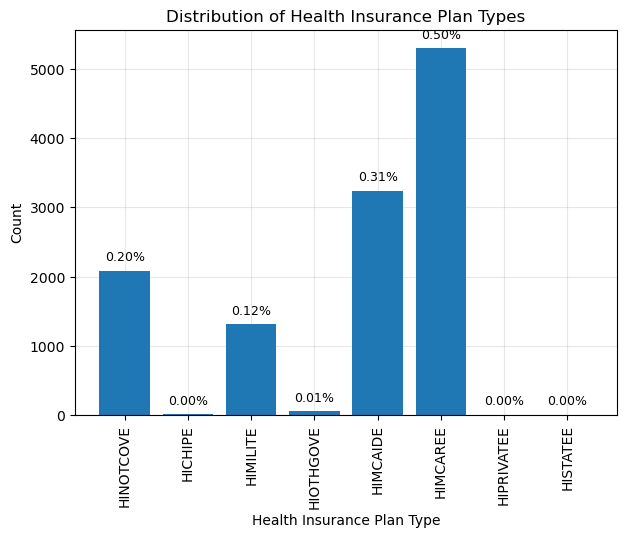

In [ ]:
# plotting how many individuals have each type of insurance plan
fig,ax = plt.subplots(1,1,figsize=(7,5))
plan_types = ['HINOTCOVE','HICHIPE','HIMILITE','HIOTHGOVE','HIMCAIDE','HIMCAREE','HIPRIVATEE','HISTATEE']

plan_type_counts = []
for type in plan_types:
    plan_type_counts.append((df[type]==1).sum())

plt.bar(plan_types,plan_type_counts)

for plan,count in zip(plan_types,plan_type_counts):
    plt.text(plan,count+100,f'{count/num_samples:.2f}%',horizontalalignment='center',verticalalignment='bottom',fontsize=9)

ax.set_xticklabels(labels=plan_types,rotation=90);
ax.set(xlabel='Health Insurance Plan Type',ylabel='Count',title='Distribution of Health Insurance Plan Types');
plt.grid(alpha=0.3)
ax.set_axisbelow(True)

In [ ]:
sum(plan_type_counts)

np.int64(12000)

^^Sum of plan_type_counts is greater than the total number of samples suggesting that individuals can have multiple plan types (e.g., a military-sponsored insurance plan could be a medicare plan)

In [ ]:
age_counts

NameError: name 'age_counts' is not defined

In [ ]:
age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts()

ValueError: Names should be list-like for a MultiIndex

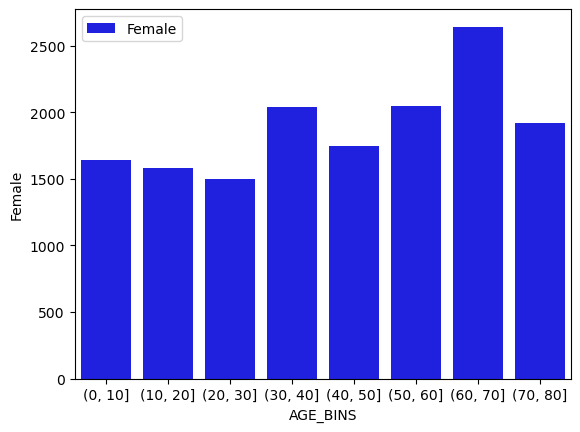

In [ ]:
# checking for balance of basic demographic info
age_bins = pd.cut(df['AGE'],bins=np.arange(0,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins,ordered=True)

age_counts.stack('SEX')

age_counts = df.groupby('AGE_BINS',observed=False)['SEX'].value_counts()
age_plot = sns.barplot(data=age_counts, x='AGE_BINS', y='Female', color='blue', label='Female')
sns.barplot(data=df, x='AGE_BINS', y=age_counts,hue='SEX', color='orange', label='Male', alpha=0.7)


In [ ]:
age_counts.stack('SEX')

   SEX     
0  AGE_BINS     (0, 10]
   Female          1645
   Male            1740
1  AGE_BINS    (10, 20]
   Female          1579
   Male            1618
2  AGE_BINS    (20, 30]
   Female          1499
   Male            1325
3  AGE_BINS    (30, 40]
   Female          2036
   Male            1778
4  AGE_BINS    (40, 50]
   Female          1746
   Male            1534
5  AGE_BINS    (50, 60]
   Female          2050
   Male            1789
6  AGE_BINS    (60, 70]
   Female          2642
   Male            2172
7  AGE_BINS    (70, 80]
   Female          1918
   Male            1537
dtype: object

In [ ]:
(age_bins.astype(str))[~np.isnan(age_bins)].unique()

TypeError: Object with dtype category cannot perform the numpy op isnan

In [ ]:
np.sort(age_bins.astype(str).unique())

TypeError: '<' not supported between instances of 'float' and 'pandas._libs.interval.Interval'

In [ ]:
age_bins = pd.cut(df['AGE'],bins=np.arange(0,90,10))
df['AGE_BINS'] = pd.Categorical(age_bins, ordered=True)


In [ ]:
plan_types.remove('HISTATEE')

/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/2622767199.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=age_counts['AGE_BINS'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/2622767199.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=age_counts['AGE_BINS'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/2622767199.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=age_counts['AGE_BINS'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/2622767199.py:10: UserWarning: set_ticklabels() should only be used with a

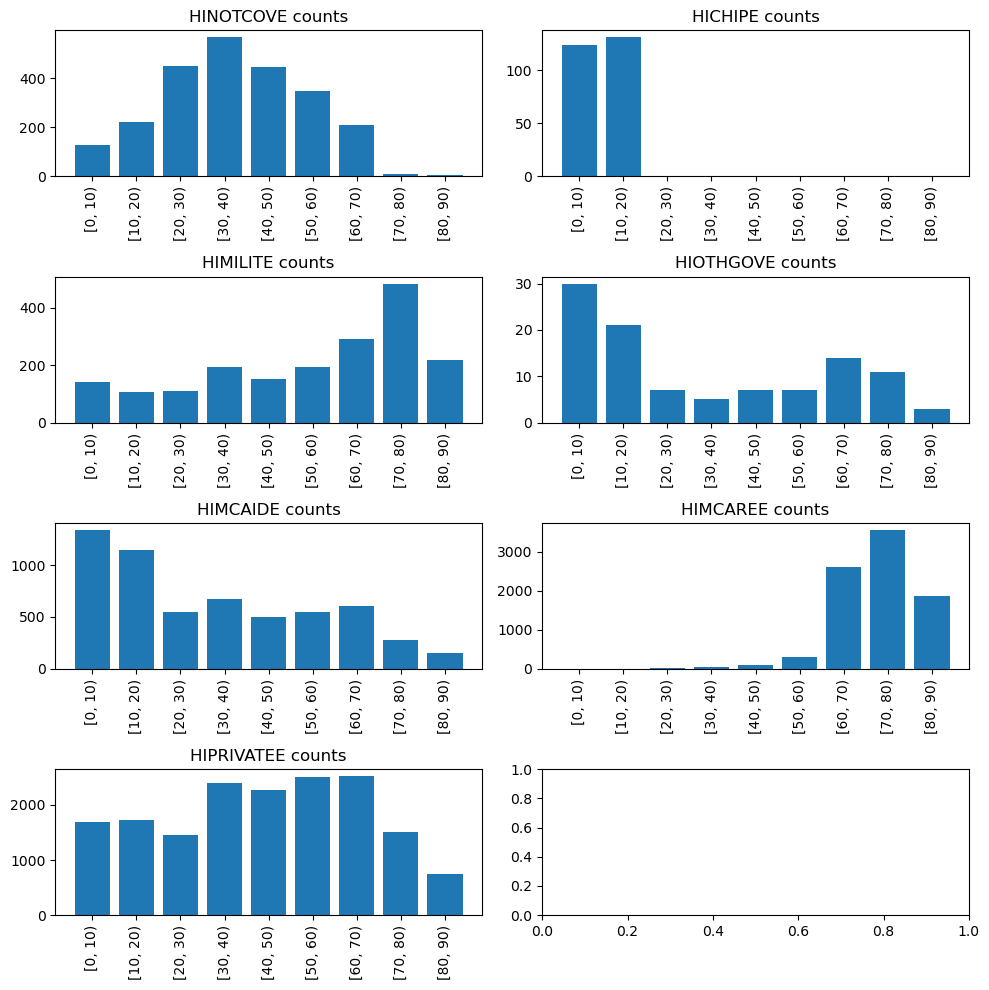

In [ ]:
# insurance plan coverage breakdown by age
fig,axes = plt.subplots(4,2,figsize=(10,10))
axes = axes.ravel()

df['AGE_BINS'] = pd.cut(df['AGE'],bins=np.arange(0,100,10),right=False)

for plan_name,ax in zip(plan_types,axes):
    age_counts = df.groupby('AGE_BINS',observed=False)[plan_name].value_counts().unstack().reset_index()
    ax.bar(age_counts['AGE_BINS'].astype(str),age_counts[1])
    ax.set_xticklabels(labels=age_counts['AGE_BINS'].astype(str),rotation=90)
    ax.set_title(f'{plan_name} counts')

plt.tight_layout()

/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/683996503.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=race_counts['RACENEW'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/683996503.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=race_counts['RACENEW'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/683996503.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=race_counts['RACENEW'].astype(str),rotation=90)
/var/folders/nt/gv7_tcf521v8vp0dk043ywpw0000gn/T/ipykernel_43228/683996503.py:8: UserWarning: set_ticklabels() should only be used with a fixed n

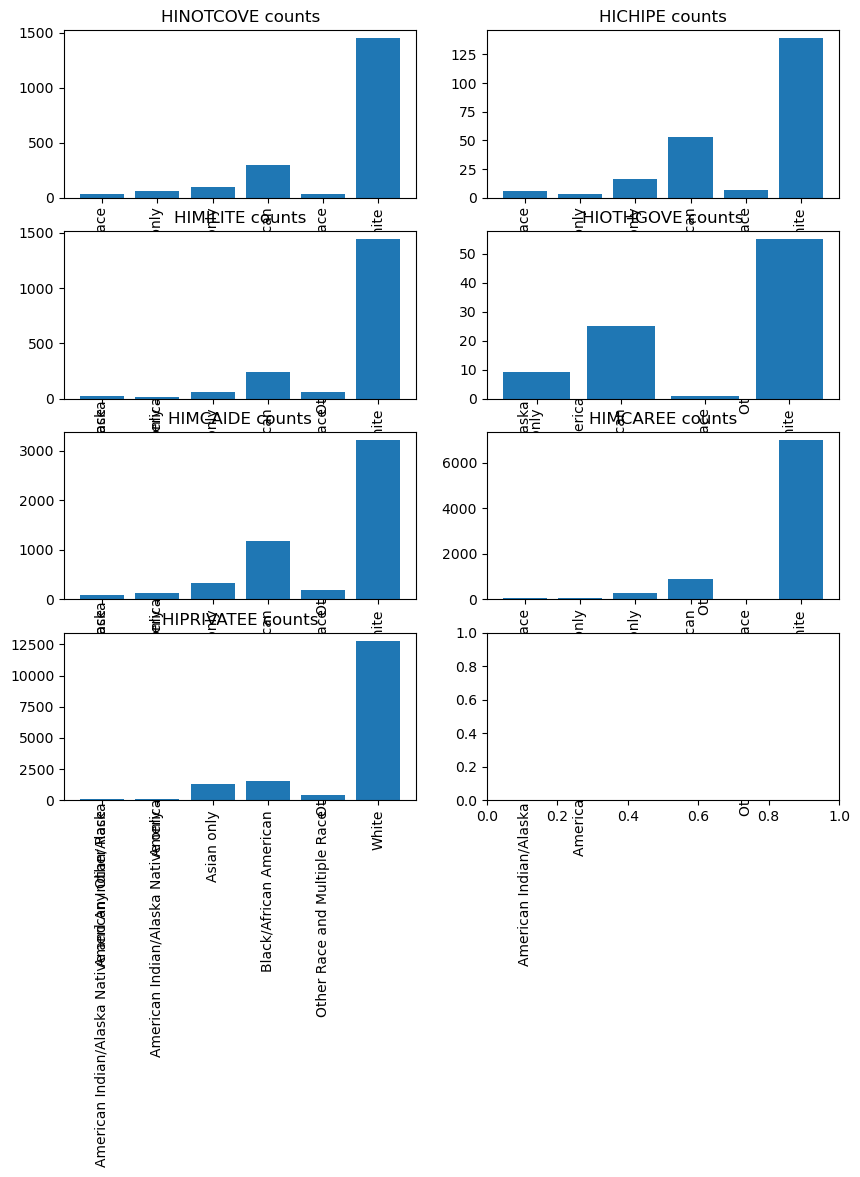

In [ ]:
# insurance plan coverage breakdown by race
fig,axes = plt.subplots(4,2,figsize=(10,10))
axes = axes.ravel()

for plan_name,ax in zip(plan_types,axes):
    race_counts = df.groupby('RACENEW',observed=False)[plan_name].value_counts().unstack().reset_index()
    ax.bar(race_counts['RACENEW'].astype(str),race_counts[1])
    ax.set_xticklabels(labels=race_counts['RACENEW'].astype(str),rotation=90)
    ax.set_title(f'{plan_name} counts')

plt.tight_layout()